In [683]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ler e analisar os dados

In [684]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 21 22:27:42 2021

@author: Utilisateur
"""
import pandas as pd


df = pd.read_excel('/content/drive/MyDrive/MBA_data/Database.xlsx', index_col=None)
df.head()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,Rmkt 7,Search 1,Search 2,Search 3,Search 4,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag,leads
0,67.177647,0.000000,0.0,0.000000,0.00000,552.287329,0.000000,0.000000,0.0,20.519805,0.0,3353.594368,450.860760,75.718121,71.646370,0.0,965.950997,235.222462,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0,0
1,3420.885973,8786.139900,0.0,5737.041917,0.00000,2071.136177,1366.977361,35.350204,0.0,25.275315,0.0,7306.236564,422.858902,87.570070,344.762166,0.0,694.082774,2146.834248,531.891351,0.000000,0.000000,0.0,33.396586,0.0,0,0
2,4207.942789,6004.475770,0.0,12306.358005,0.00000,4229.737244,2713.175424,206.891574,0.0,38.460050,0.0,7889.436093,581.513248,102.705468,684.815084,0.0,2539.484046,2261.165457,2069.699426,282.404050,102.513534,0.0,380.934946,0.0,0,0
3,6328.724014,359.465712,0.0,0.000000,34.94577,4829.948289,1913.018103,88.015632,0.0,33.366603,0.0,2879.365595,1647.366100,109.320350,79.707614,0.0,559.289987,765.482371,2259.469113,197.917148,197.164612,0.0,66.560108,0.0,0,0
4,2165.951657,1637.755671,0.0,727.490691,0.00000,4956.284104,1766.960185,749.291333,0.0,34.499781,0.0,1246.079254,800.955961,13.565649,309.309140,0.0,421.522216,257.384030,3518.026591,272.718801,1033.278842,0.0,55.112592,0.0,1,0


In [685]:
df.tail()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,Rmkt 7,Search 1,Search 2,Search 3,Search 4,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag,leads
555,19950.181798,88509.273567,0.0,0.0,0.0,124066.514268,48401.443191,5008.932601,0.0,0.0,0.000000,29628.227848,13025.915958,71.358468,0.0,10028.586110,1400.298544,31941.736558,45219.765719,274.427072,0.0,1077.992634,0.0,0.0,0,1624
556,28244.751573,89315.699658,0.0,0.0,0.0,90871.055136,67331.572963,2463.114720,0.0,0.0,0.641733,29758.832352,15009.361249,80.064064,0.0,10764.462599,1788.904011,31820.214663,55801.764157,26.532636,0.0,1346.375191,0.0,0.0,0,1718
557,23502.079726,11860.970117,0.0,0.0,0.0,76227.995754,38475.732137,2944.428787,0.0,0.0,0.002055,42048.213760,17901.454151,80.228579,0.0,10999.431434,1459.448613,16473.969470,24064.566462,36.832345,0.0,1062.004499,0.0,0.0,0,1797
558,19120.011805,107183.606418,0.0,0.0,0.0,139951.049905,50687.067498,2122.691642,0.0,0.0,0.000000,28919.832252,13487.483916,102.527244,0.0,15445.667212,1086.561203,31459.789279,58559.906956,57.236851,0.0,942.000463,0.0,0.0,0,1814
559,25929.296341,100796.879581,0.0,0.0,0.0,108872.787470,46005.523362,2199.746449,0.0,0.0,0.000000,32211.191891,14359.866892,87.748295,0.0,15952.867574,814.679270,34601.549763,42260.647983,60.119073,0.0,1404.326767,0.0,0.0,0,1880


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branding    560 non-null    float64
 1   DPA 1       560 non-null    float64
 2   DPA 3       560 non-null    float64
 3   DRA 1       560 non-null    float64
 4   DRA 3       560 non-null    float64
 5   Display 1   560 non-null    float64
 6   Display 2   560 non-null    float64
 7   Rmkt 1      560 non-null    float64
 8   Rmkt 3      560 non-null    float64
 9   Rmkt 6      560 non-null    float64
 10  Rmkt 7      560 non-null    float64
 11  Search 1    560 non-null    float64
 12  Search 2    560 non-null    float64
 13  Search 3    560 non-null    float64
 14  Search 4    560 non-null    float64
 15  Search 5    560 non-null    float64
 16  Search 6    560 non-null    float64
 17  Shopping 1  560 non-null    float64
 18  Shopping 2  560 non-null    float64
 19  Shopping 3  560 non-null    f

In [687]:
df["Flag"].unique()

array([0, 1])

In [688]:
df.describe()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,Rmkt 7,Search 1,Search 2,Search 3,Search 4,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag,leads
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,8018.473185,25015.815670,26.978608,1954.799712,5.552829,34192.720789,16278.202340,1905.845969,9.302894,19.651566,93.451392,9429.370786,4874.770744,93.049063,317.123483,6075.634527,1441.044956,10414.923629,19656.574140,150.061667,303.287431,723.676824,55.289752,6.214189,0.135714,356.350000
std,6802.185097,25644.786073,64.612735,3219.661711,20.439290,47434.090203,16267.133740,1601.399285,10.890705,17.149563,341.998038,11754.151029,4843.540430,75.014033,539.097701,8077.900527,814.719657,12015.736457,13267.717379,143.983688,410.288634,1242.794459,127.064023,43.283801,0.342791,340.442775
min,67.177647,0.000000,0.000000,0.000000,0.000000,492.680182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.753677,2.789904,0.000000,0.000000,322.929628,66.251642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2973.526173,6309.481809,0.000000,0.000000,0.000000,5230.974739,3458.904764,646.219133,0.000000,0.000000,0.000000,1822.312592,1202.594587,47.227858,0.000000,0.000000,845.258533,1381.497541,9485.258387,56.645965,0.000000,0.000000,0.000000,0.000000,0.000000,96.250000
50%,6101.762570,15686.267265,0.000000,514.110000,0.000000,15923.995225,9652.848213,1551.087007,0.000000,32.727023,0.000000,4232.379728,3249.990921,67.499216,0.000000,1381.447844,1205.834723,5005.035946,18031.337938,80.317257,0.000000,0.000000,0.000000,0.000000,0.000000,244.000000
75%,10516.815208,33235.285301,0.000000,2409.695612,0.000000,44262.053403,25343.706212,2705.543290,15.704347,34.283449,0.000000,10989.702759,6459.115239,116.216279,486.613683,12725.881362,1866.071922,15522.041680,27270.099596,203.996532,592.287280,1197.118108,53.885583,0.000000,0.000000,525.000000
max,30476.144041,109287.228006,427.513312,16634.053759,198.261380,476825.705107,68852.222277,9482.094034,62.735130,55.557208,1819.524402,49960.167870,25541.615442,571.738304,2969.437667,36737.162703,4774.594408,52292.554973,59275.553543,725.415749,1570.057666,6085.899894,606.629236,362.486170,1.000000,1880.000000


O nosso *dataset* tem como *target* a coluna `leads`.  
O minimo é o maximo dessa coluna sao respetivamente **0** e **1880**.  
Em média, a coluna `leads` vale **356.35**.  
Essa coluna representa a quantidade de `leads` gerada pela estrategia de investimento representada pelas outras colunas na mesma linha.  
Um `lead` é um contato com um cliente potencial. 

Olhando pros nomes das colunas, vemos 7 principais tipos de canais de comunicaçao de marketing:  
- **Branding**: pode representar o dinheiro investido no branding da marca
- **DPA**: pode representar o dinheiro investido em canais de Dynamic Product Ads - modelos de anúncios personalizados de acordo com os dados individuais do consumidor
- **DRA**: pode representar o dinheiro investido em canais de Dynamic Remarketing Adds - banners criados automaticamente com base no histórico de pesquisas de usuários em seu site.
- **Display**: pode representar o dinheiro investido em canais de Display Advertising
-  **Rmkt**: pode representar o dinheiro investido em canais de Remarketing
- **Search**: pode representar o dinheiro investido em canais de pesquisa como Google, ou outras plataformas de pesquisa
- **Shopping**: pode representar o dinheiro investido em canais de Shopping online, como Mercado Livre, e outros sites de e-commerce
- **Flag**: vale 0 ou 1. Temos que analisa-la melhor para entender o que ela representa.

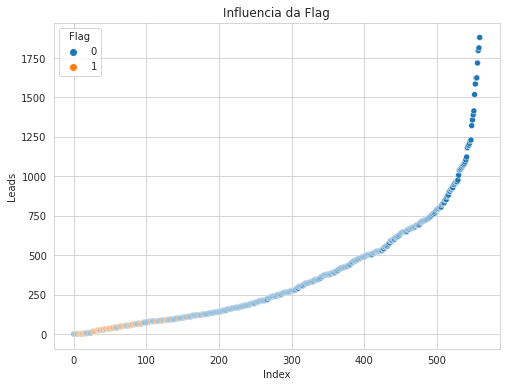

<Figure size 432x288 with 0 Axes>

In [689]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

plt.title('Influencia da Flag')
sns.scatterplot(x=df.index,y=df['leads'],hue=df['Flag'])
plt.xlabel('Index')
plt.ylabel('Leads')

plt.show()
plt.tight_layout()

In [690]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_var_vs_leads(ax, df, var):
  name_x = var.capitalize()
  if ax is not None:
    sns.scatterplot(ax=ax, x=df[var],y=df['leads'],hue=df['Flag'])
    ax.set_title(name_x)
  else:
    plt.figure(figsize=(8,6))
    plt.title('Influencia da Flag')
    sns.scatterplot(x=df[var],y=df['leads'],hue=df['Flag'])
    plt.xlabel(name_x)
    plt.ylabel('Leads')

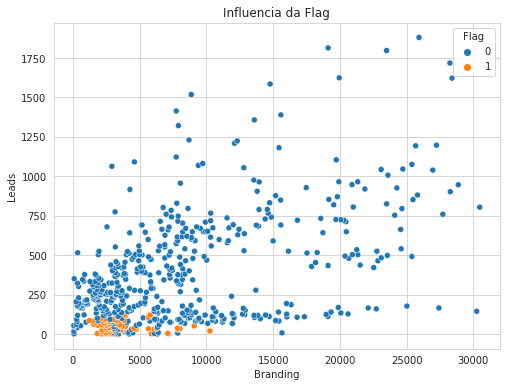

In [691]:
plot_var_vs_leads(None, df, "Branding")

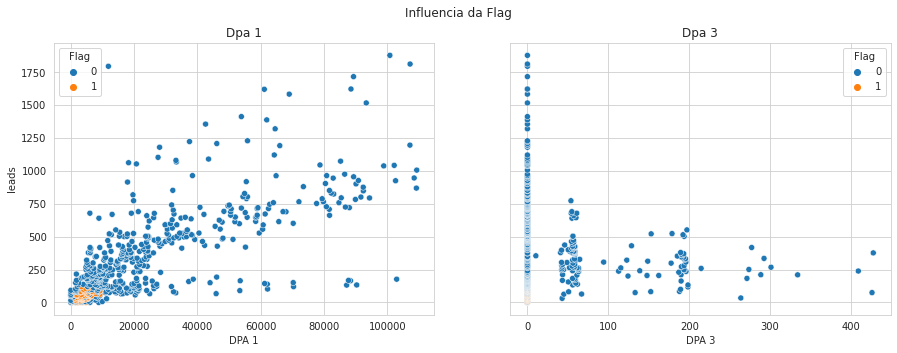

In [692]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df, "DPA 1")
plot_var_vs_leads(axes[1], df, "DPA 3")

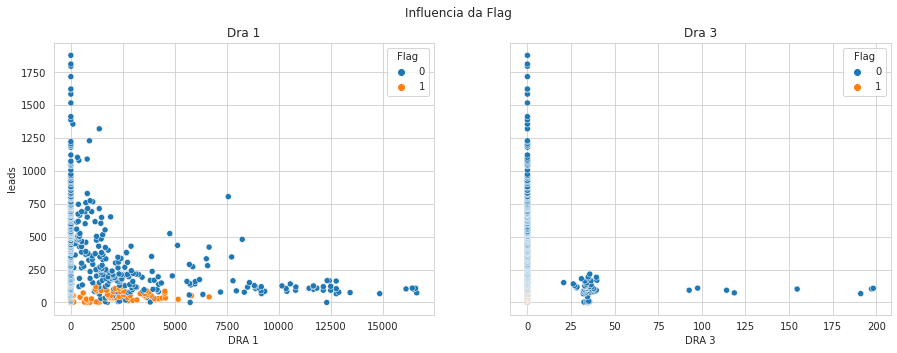

In [693]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df, "DRA 1")
plot_var_vs_leads(axes[1], df, "DRA 3")

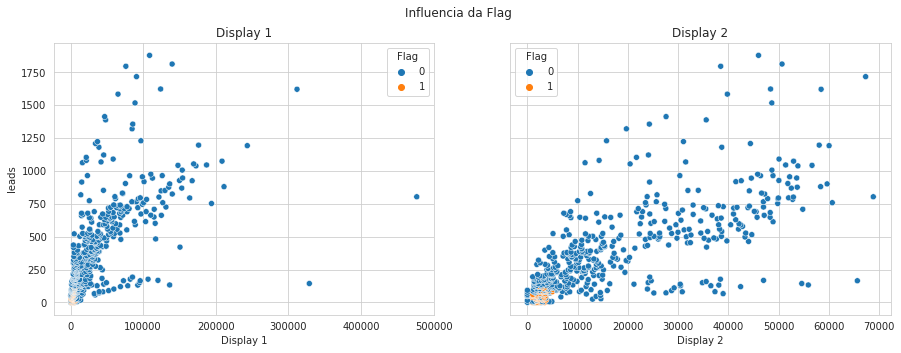

In [694]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df, "Display 1")
plot_var_vs_leads(axes[1], df, "Display 2")

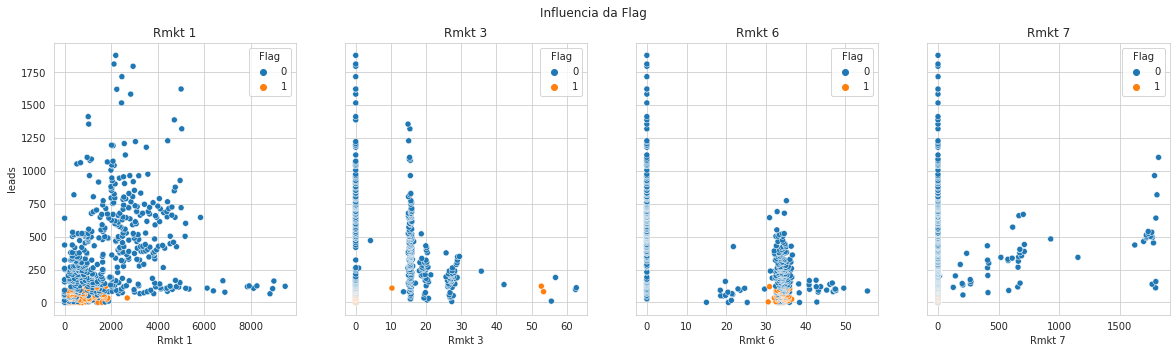

In [695]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df, "Rmkt 1")
plot_var_vs_leads(axes[1], df, "Rmkt 3")
plot_var_vs_leads(axes[2], df, "Rmkt 6")
plot_var_vs_leads(axes[3], df, "Rmkt 7")

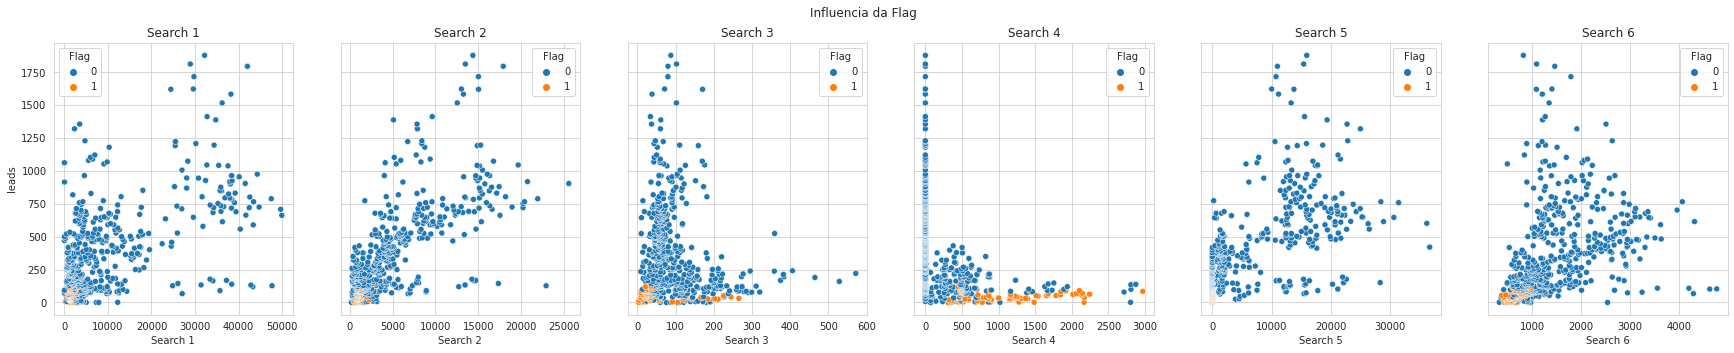

In [696]:
fig, axes = plt.subplots(1, 6, figsize=(30, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df, "Search 1")
plot_var_vs_leads(axes[1], df, "Search 2")
plot_var_vs_leads(axes[2], df, "Search 3")
plot_var_vs_leads(axes[3], df, "Search 4")
plot_var_vs_leads(axes[4], df, "Search 5")
plot_var_vs_leads(axes[5], df, "Search 6")

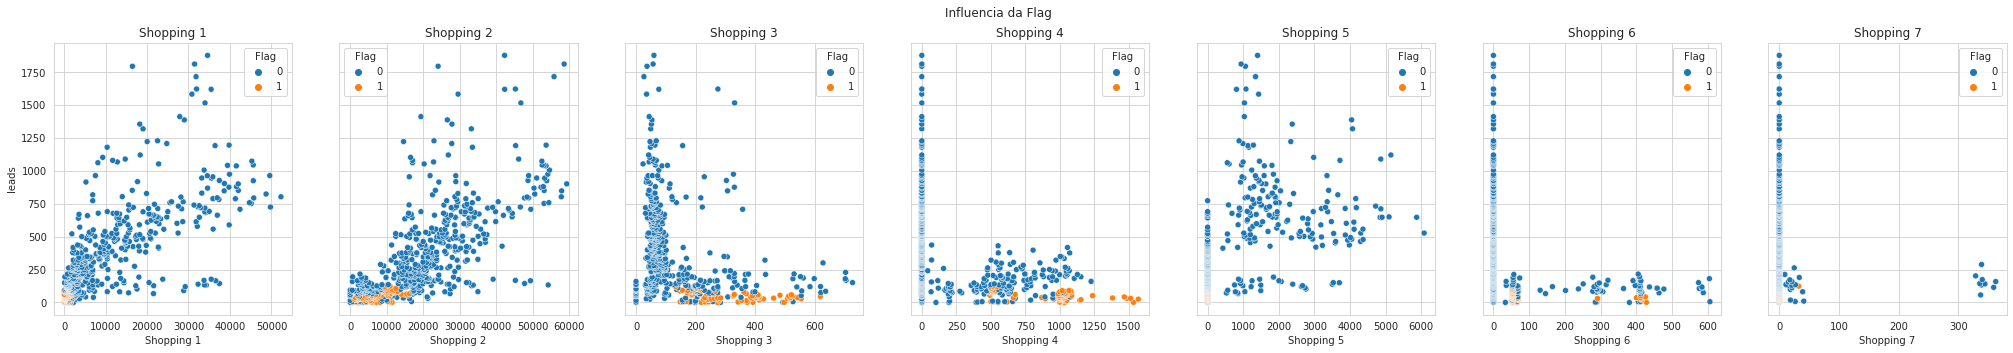

In [697]:
fig, axes = plt.subplots(1, 7, figsize=(35, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df, "Shopping 1")
plot_var_vs_leads(axes[1], df, "Shopping 2")
plot_var_vs_leads(axes[2], df, "Shopping 3")
plot_var_vs_leads(axes[3], df, "Shopping 4")
plot_var_vs_leads(axes[4], df, "Shopping 5")
plot_var_vs_leads(axes[5], df, "Shopping 6")
plot_var_vs_leads(axes[6], df, "Shopping 7")

A partir desses graficos, podemos constatar o seguinte:
- A concentraçao de `Flag` 1 é mais importante quando a quantidade de `leads` é baixa.
- A `Flag` 1 parece corresponder a uma estrategia de investimento diferente:
  - Ela coincida com um investimento baixo em todos os canais menos nos canais
    - `Rmkt 3`
    - `Rmkt 6`
    - `Search 3`
    - `Search 4`
    - `Shopping 3`
    - `Shopping 4`
    - `Shopping 6`
- As variaveis as mais coreladas a quantidade de `leads` sao
  - `Branding`
  - `DPA 1`
  - `Display 1`
  - `Display 2`
  - `Rmkt 1`
  - `Search 1`
  - `Search 2`
  - `Search 5`
  - `Search 6`
  - `Shopping 1`
  - `Shopping 2`
  - `Shopping 5`

# Processar os dados

Nao tem valores null, variavel de categoria, tambem nao parece ter outliers.  
Vamos prosseguir com o treinamento de uma baseline nos dados brutos. 

# Separaçao em sets de treinamento e de teste

In [698]:
y = df["leads"]
X = df.drop(["leads"], axis=1)

In [699]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Um pouco de feature engineering

Vamos adicionar 6 variaveis, os totais de investimento por tipo de canal.

In [700]:
l_DPA = ["DPA 1", "DPA 3"]
l_DRA = ["DRA 1", "DRA 3"]
l_Display = ["Display 1", "Display 2"]
l_Rmkt = ["Rmkt 1", "Rmkt 3", "Rmkt 6", "Rmkt 7"]
l_Search = ["Search 1", "Search 2", "Search 3", "Search 4", "Search 5", "Search 6"]
l_Shopping = ["Shopping 1", "Shopping 2", "Shopping 3", "Shopping 4", "Shopping 5", "Shopping 6", "Shopping 7"]

In [701]:
X_train.loc[:, 'total_DPA'] = (X_train.loc[:, l_DPA]).sum(axis=1)
X_train.loc[:, 'total_DRA'] = (X_train.loc[:, l_DRA]).sum(axis=1)
X_train.loc[:, 'total_Display'] = (X_train.loc[:, l_Display]).sum(axis=1)
X_train.loc[:, 'total_Rmkt'] = (X_train.loc[:, l_Rmkt]).sum(axis=1)
X_train.loc[:, 'total_Search'] = (X_train.loc[:, l_Search]).sum(axis=1)
X_train.loc[:, 'total_Shopping'] = (X_train.loc[:, l_Shopping]).sum(axis=1)

X_test.loc[:, 'total_DPA'] = (X_test.loc[:, l_DPA]).sum(axis=1)
X_test.loc[:, 'total_DRA'] = (X_test.loc[:, l_DRA]).sum(axis=1)
X_test.loc[:, 'total_Display'] = (X_test.loc[:, l_Display]).sum(axis=1)
X_test.loc[:, 'total_Rmkt'] = (X_test.loc[:, l_Rmkt]).sum(axis=1)
X_test.loc[:, 'total_Search'] = (X_test.loc[:, l_Search]).sum(axis=1)
X_test.loc[:, 'total_Shopping'] = (X_test.loc[:, l_Shopping]).sum(axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [702]:
df_train = X_train.copy()
df_train["leads"] = y_train

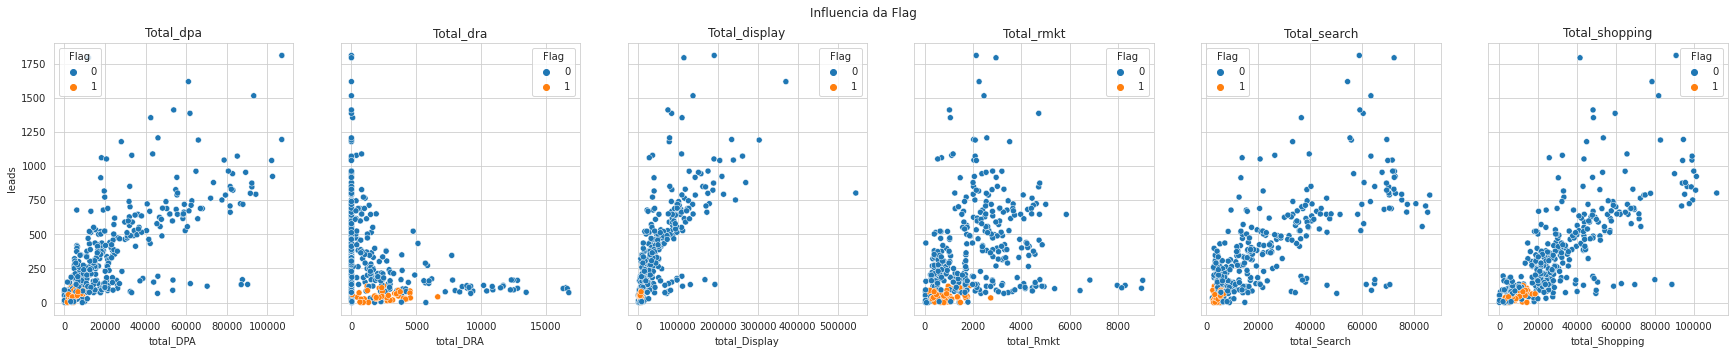

In [703]:
fig, axes = plt.subplots(1, 6, figsize=(30, 5), sharey=True)
fig.suptitle('Influencia da Flag')

plot_var_vs_leads(axes[0], df_train, "total_DPA")
plot_var_vs_leads(axes[1], df_train, "total_DRA")
plot_var_vs_leads(axes[2], df_train, "total_Display")
plot_var_vs_leads(axes[3], df_train, "total_Rmkt")
plot_var_vs_leads(axes[4], df_train, "total_Search")
plot_var_vs_leads(axes[5], df_train, "total_Shopping")

In [704]:
X_train.head()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,Rmkt 7,Search 1,Search 2,Search 3,Search 4,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag,total_DPA,total_DRA,total_Display,total_Rmkt,total_Search,total_Shopping
42,4722.607749,3036.477611,0.0,4199.882397,0.0,3975.993620,2724.795407,1036.548582,0.000000,35.736805,0.000000,1296.489453,1238.257927,202.737565,1181.383651,0.000000,556.479519,221.224960,2658.598501,262.836611,1488.300466,0.000000,67.910504,0.0,1,3036.477611,4199.882397,6700.789027,1072.285387,4475.348114,4698.871042
362,8713.538328,16694.556934,0.0,0.000000,0.0,32514.947752,19122.249490,2298.133393,15.957974,0.000000,675.917554,5753.706621,4097.230492,56.654922,0.000000,5857.241520,1930.448776,5181.078887,28948.686819,38.274823,0.000000,0.000000,0.000000,0.0,0,16694.556934,0.000000,51637.197242,2990.008922,17695.282331,34168.040529
208,4370.351371,43982.316144,0.0,1053.704981,0.0,49446.646766,34836.676938,1209.364945,14.977738,0.000000,0.000000,6044.569495,8037.787674,50.129152,0.000000,22171.514715,1952.068815,14422.717590,32509.567326,57.706448,0.000000,3701.917397,0.000000,0.0,0,43982.316144,1053.704981,84283.323704,1224.342683,38256.069852,50691.908761
312,424.326998,7001.129416,0.0,2146.104924,0.0,4763.416217,2544.762729,966.506236,28.824434,34.171274,0.000000,1777.758106,755.032184,95.487364,13.318876,0.000000,725.717676,2711.854847,12590.159230,626.472977,856.802016,0.000000,0.000000,0.0,0,7001.129416,2146.104924,7308.178947,1029.501944,3367.314207,16785.289070
533,24718.581926,78715.567180,0.0,0.000000,0.0,187357.304718,51408.959351,2027.272826,0.000000,0.000000,0.000000,32717.980964,19640.126187,176.257472,0.000000,17789.220510,1445.882964,45617.144801,52549.363180,64.650937,0.000000,956.109286,0.000000,0.0,0,78715.567180,0.000000,238766.264069,2027.272826,71769.468098,99187.268204


# Avaliar modelos

## Estabelecer uma baseline

Treinamos uma regressao linear para servir de referencia.

In [705]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.6284280069795254
0.5648003271505283


In [706]:
from sklearn.metrics import mean_absolute_error
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_pred))

116.62902955927669
130.53531083642116


A media da nossa quantidade de `leads` é de 356.  
O minimo é 0, o maximo 1880, a media 244, o primeiro quartil 96.  
O **MAE** no set de test é de 130, ou seja, esse primeiro modelo erra em media de mais que o valor do primeiro quartil na prediçao da quantidade de leads que o investimento pode gerar. Ou seja, mais de 25% dos nossos investimentos geraram menos *leads* que o erro medio do nosso modelo.

In [707]:
# Factorizaçao do codigo de avaliaçao para futuros usos
def get_r2_mae(reg, X_train, X_test):
  print("R² train =", reg.score(X_train, y_train))
  print("R² test =", reg.score(X_test, y_test))

  y_train_pred = reg.predict(X_train)
  y_pred = reg.predict(X_test)
  print("MAE train =", mean_absolute_error(y_train, y_train_pred))
  print("MAE test =", mean_absolute_error(y_test, y_pred))

## Escolher um modelo

### Testar e otimizar modelos

In [708]:
# objetivo com o resultado dos modelos
resultados = pd.DataFrame(columns = ['Method', 'MAE'])

# função que plota os n maiores coeficientes positivos e negativos
def plot_coefs(coefs, n):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  coefs.nsmallest(n, 'coef').query('coef < 0').sort_values('coef', ascending = False).plot(kind = 'barh', x = 'features', y = 'coef', color = 'red',  title = 'Coeficientes Negativos', legend=False, ax=ax1)
  coefs.nlargest(n, 'coef').query('coef >= 0').sort_values('coef', ascending = True).plot(kind = 'barh', x = 'features', y = 'coef', color = 'blue', title = 'Coeficientes Possitivos', legend=False, ax=ax2, xlabel = "")
  fig.tight_layout()

def plot_predict(y_test, y_predict):
  plt.figure()
  plt.scatter(y_test, y_predict)
  plt.xlabel('Numero de leads real')
  plt.ylabel('Numero de leads predito')
  plt.show()

#### MMQ

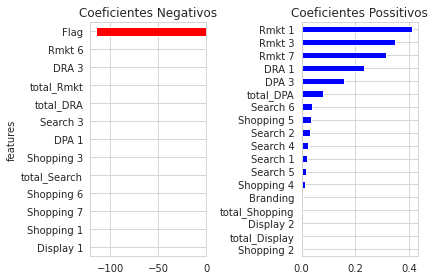

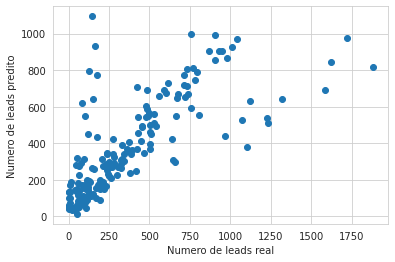

              Method         MAE
0  Mínimos Quadrados  130.535311


In [709]:
# treinando modelo
linear = linear_model.LinearRegression().fit(X_train,y_train)

# plotando maiores coeficientes
plot_coefs(
    coefs = pd.DataFrame({
        'features':X_train.columns, 
        'coef':linear.coef_
        }), 
    n = 25
    )

# plotando nota real x nota predita
plot_predict(y_test, y_predict = linear.predict(X_test))

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Mínimos Quadrados"], 
    'MAE': [mean_absolute_error(linear.predict(X_test), y_test)]
    }))
print(resultados)

##### MMQ com seleção de variaveis

In [710]:
from sklearn.feature_selection import RFECV
linear = linear_model.LinearRegression()
linear_rfe = RFECV(
    linear, min_features_to_select = 15, 
    step = 0.3, verbose = 10, cv=2
    ).fit(X_train,y_train)

Fitting estimator with 31 features.
Fitting estimator with 22 features.
Fitting estimator with 31 features.
Fitting estimator with 22 features.
Fitting estimator with 31 features.
Fitting estimator with 22 features.


In [711]:
sel_feats_lin = X_train.columns[linear_rfe.support_]

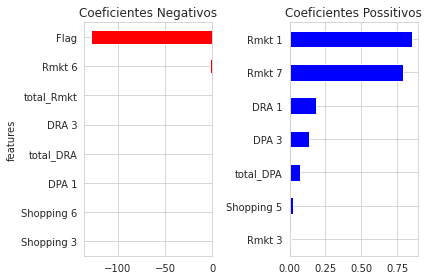

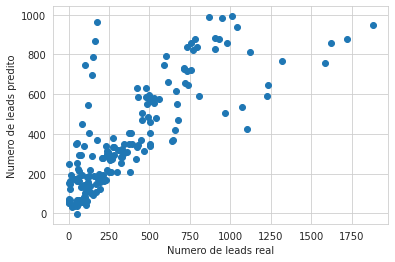

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412


In [712]:
# treinando modelo
linear = LinearRegression().fit(X_train[sel_feats_lin], y_train)

# plotando maiores coeficientes
plot_coefs(
    coefs = pd.DataFrame({
        'features':[i for (i, v) in zip(X_train.columns, linear_rfe.support_) if v],
        'coef':linear.coef_
        }), 
    n = 20
    )

# plotando nota real x nota predita
plot_predict(y_test, y_predict = linear.predict(X_test[sel_feats]))

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Mínimos Quadrados RFE"], 
    'MAE': [mean_absolute_error(linear.predict(X_test[sel_feats]), y_test)]
    }))
print(resultados)

#### Lasso

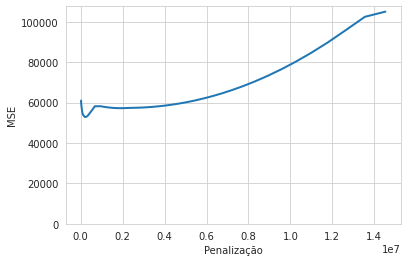

Best Alpha: 206015.6714187815


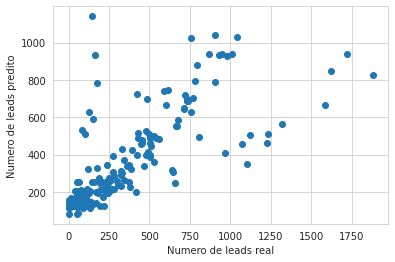

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412
0                  Lasso  142.026703


In [715]:
from sklearn.linear_model import LassoCV

# treinando modelo
lasso = LassoCV(cv=2).fit(X_train, y_train)

# plotando MSE x Penalização
plt.figure()
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1),linewidth=2)
plt.ylim(bottom=0)
plt.xlabel('Penalização')
plt.ylabel('MSE')
plt.show()

# imprimir melhor alpha
print(f'Best Alpha: {lasso.alpha_}')


# plotando nota real x nota predita

plot_predict(y_test, y_predict = lasso.predict(X_test))

resultados = resultados.append(pd.DataFrame({
    'Method': ["Lasso"], 
    'MAE': [mean_absolute_error(lasso.predict(X_test), y_test)]
    }))
print(resultados)

#### KNN

Best Paramns: {'n_neighbors': 29}


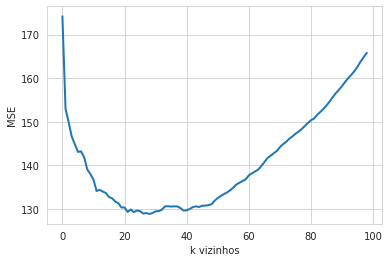

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412
0                  Lasso  142.026703
0                    KNN  130.383970


In [716]:
from sklearn.model_selection import GridSearchCV

import numpy as np
from sklearn.metrics import make_scorer

# criando modelo
knn = KNeighborsRegressor()

# otimização de hiperparametros
param_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn, param_grid, cv=2, scoring="neg_mean_absolute_error")
knn_gscv.fit(X_train, y_train)

print(f'Best Paramns: {knn_gscv.best_params_}')

plt.figure()
plt.plot(knn_gscv.cv_results_['mean_test_score']*-1,linewidth=2)
plt.xlabel('k vizinhos')
plt.ylabel('MSE')
plt.show()

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["KNN"], 
    'MAE': [mean_absolute_error(knn_gscv.predict(X_test), y_test)]
    }))

print(resultados)

#### Arvore

{'max_depth': 3}


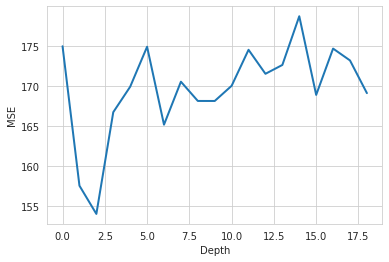

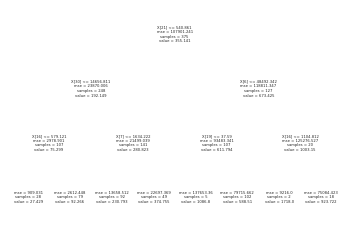

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412
0                  Lasso  142.026703
0                    KNN  130.383970
0      Árvore de Decisão  146.750512


In [717]:
from sklearn.tree import plot_tree

# criando modelo
tree = DecisionTreeRegressor()

# otimização de hiperparametros
param_grid = [{'max_depth':np.arange(1, 20)}]
tree_gscv = GridSearchCV(tree, param_grid, cv=2, scoring="neg_mean_absolute_error")
tree_gscv.fit(X_train, y_train)
print(tree_gscv.best_params_)

plt.figure()
plt.plot(tree_gscv.cv_results_['mean_test_score']*-1, linewidth=2)
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.show()

# plotando arvore de decisão
plot_tree(tree_gscv.best_estimator_)
plt.show()

# salvando resultado
resultados = resultados.append(pd.DataFrame({
    'Method': ["Árvore de Decisão"], 
    'MAE': [mean_absolute_error(tree_gscv.predict(X_test), y_test)]
    }))

print(resultados)

#### Floresta

{'max_depth': 3}
Index(['Branding', 'DPA 1', 'DPA 3', 'DRA 1', 'DRA 3', 'Display 1',
       'Display 2', 'Rmkt 1', 'Rmkt 3', 'Rmkt 6', 'Rmkt 7', 'Search 1',
       'Search 2', 'Search 3', 'Search 4', 'Search 5', 'Search 6',
       'Shopping 1', 'Shopping 2', 'Shopping 3', 'Shopping 4', 'Shopping 5',
       'Shopping 6', 'Shopping 7', 'Flag', 'total_DPA', 'total_DRA',
       'total_Display', 'total_Rmkt', 'total_Search', 'total_Shopping'],
      dtype='object')


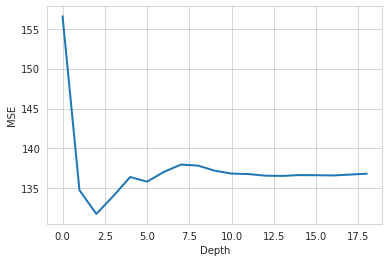

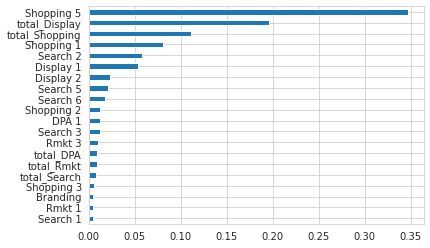

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412
0                  Lasso  142.026703
0                    KNN  130.383970
0      Árvore de Decisão  146.750512
0               Floresta  134.639796


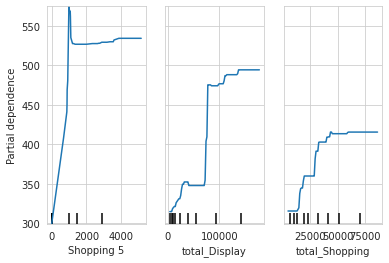

In [718]:
from sklearn.inspection import plot_partial_dependence

def explore_optimize_rf(X_train, X_test, y_train):
  # criando modelo
  floresta = RandomForestRegressor(random_state=42, n_jobs=-1)

  # otimização de hiperparametros
  param_grid = [{'max_depth':np.arange(1, 20)}]
  floresta_gscv = GridSearchCV(floresta, param_grid, cv=2,scoring="neg_mean_absolute_error")
  floresta_gscv.fit(X_train, y_train)
  print(floresta_gscv.best_params_)
  print(X_train.columns)
  plt.figure()
  plt.plot(floresta_gscv.cv_results_['mean_test_score']*-1,linewidth=2)
  plt.xlabel('Depth')
  plt.ylabel('MSE')
  plt.show()

  # utilizando o melhores parametros
  floresta.set_params(**floresta_gscv.best_params_)
  floresta.fit(X_train, y_train)

  # plotando as variaveis mais importantes
  feat_importances = pd.Series(floresta.feature_importances_, index=X_train.columns)
  feat_importances.nlargest(20)[::-1].plot(kind='barh')
  plt.show()

  # plotando dependencia com 3 variaveis mais importantes
  plot_partial_dependence(
      floresta, 
      X_test, 
      feature_names=X_train.columns,
      features=list(feat_importances.nlargest(3).index[:3])
      )
  return floresta


floresta = explore_optimize_rf(X_train, X_test, y_train)
# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Floresta"], 
    "MAE": [mean_absolute_error(floresta.predict(X_test), y_test)]
    }))

print(resultados)

##### Floresta com seleçao de variaveis

In [719]:
from sklearn.feature_selection import RFECV
floresta = RandomForestRegressor(random_state=42, n_jobs=-1)
floresta_rfe = RFECV(
    floresta, min_features_to_select = 15, 
    step = 0.3, verbose = 10, cv=2
    ).fit(X_train,y_train)

Fitting estimator with 31 features.
Fitting estimator with 22 features.
Fitting estimator with 31 features.
Fitting estimator with 22 features.
Fitting estimator with 31 features.


In [720]:
sel_feats_rf = X_train.columns[floresta_rfe.support_]

In [721]:
sel_feats_rf

Index(['Branding', 'DPA 1', 'DPA 3', 'Display 1', 'Display 2', 'Rmkt 1',
       'Rmkt 3', 'Rmkt 7', 'Search 1', 'Search 2', 'Search 3', 'Search 5',
       'Search 6', 'Shopping 1', 'Shopping 2', 'Shopping 3', 'Shopping 5',
       'total_DPA', 'total_Display', 'total_Rmkt', 'total_Search',
       'total_Shopping'],
      dtype='object')

{'max_depth': 3}
Index(['Branding', 'DPA 1', 'DPA 3', 'Display 1', 'Display 2', 'Rmkt 1',
       'Rmkt 3', 'Rmkt 7', 'Search 1', 'Search 2', 'Search 3', 'Search 5',
       'Search 6', 'Shopping 1', 'Shopping 2', 'Shopping 3', 'Shopping 5',
       'total_DPA', 'total_Display', 'total_Rmkt', 'total_Search',
       'total_Shopping'],
      dtype='object')


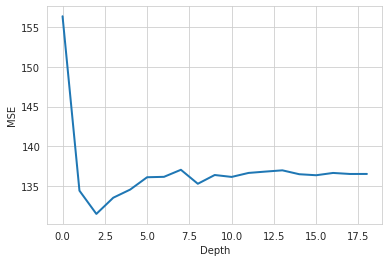

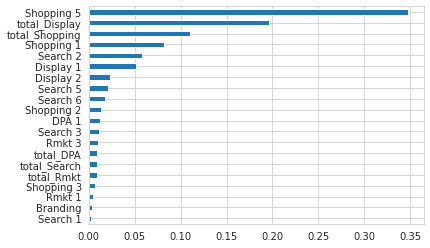

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412
0                  Lasso  142.026703
0                    KNN  130.383970
0      Árvore de Decisão  146.750512
0               Floresta  134.639796
0           Floresta RFE  135.234666


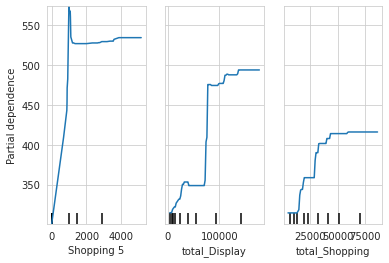

In [722]:
floresta = explore_optimize_rf(X_train[sel_feats_rf], X_test[sel_feats_rf], y_train)
# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Floresta RFE"], 
    "MAE": [mean_absolute_error(floresta.predict(X_test[sel_feats_rf]), y_test)]
    }))

print(resultados)

#### XGBoost

{'colsample_bytree': 0.75, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 400, 'subsample': 0.8}


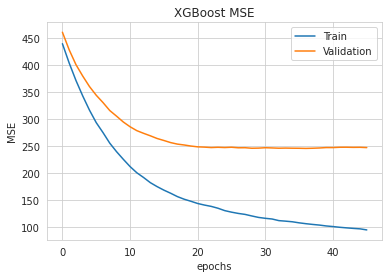

                  Method         MAE
0      Mínimos Quadrados  130.535311
0  Mínimos Quadrados RFE  128.368412
0                  Lasso  142.026703
0                    KNN  130.383970
0      Árvore de Decisão  146.750512
0               Floresta  134.639796
0           Floresta RFE  135.234666
0                XGBoost  141.373380


In [723]:
# criando modelo
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

# otimização de hiperparametros
parameters = {'max_depth': [3,7,12],
              'min_child_weight': [5,10,20],
              'subsample': [0.8,1],
              'colsample_bytree': [0.75,1],
              'n_estimators': [400], 
              'eta':[0.01,0.1,0.5]}

X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=7)
eval_set = [(X_train_1,y_train_1), (X_val, y_val)]

xgb_model_gscv = GridSearchCV(xgb_model, parameters, n_jobs=4, cv=2,scoring="neg_mean_absolute_error")
xgb_model_gscv.fit(
    X_train_1, y_train_1,
    eval_set=eval_set,eval_metric="rmse",
    verbose=0,early_stopping_rounds=10)

print(xgb_model_gscv.best_params_)
xgb_results = xgb_model_gscv.best_estimator_.evals_result()

# plot 
epochs = len(xgb_results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, xgb_results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, xgb_results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.title('XGBoost MSE')
plt.show()

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["XGBoost"], 
    'MAE': [mean_absolute_error(xgb_model_gscv.predict(X_test), y_test)]
    }))

print(resultados)

### Comparar os modelos

In [724]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

# spot-check basic Classification algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LR RFE', LinearRegression()))
models.append(('LASSO', Lasso(alpha=206015.6714187815)))
models.append(('KNN', KNeighborsRegressor(n_neighbors=29)))
models.append(('CART', DecisionTreeRegressor(max_depth=3)))
models.append(('RF', RandomForestRegressor(max_depth=3, n_jobs=-1)))
models.append(('RF RFE', RandomForestRegressor(max_depth=3, n_jobs=-1)))

xgb_param_grid = {'colsample_bytree': 0.75, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 400, 'subsample': 0.8}
models.append(('XGB', xgb.XGBRegressor(objective ='reg:squarederror', **xgb_param_grid, n_jobs=-1)))

In [725]:
from sklearn.model_selection import KFold, cross_val_score

num_folds = 10
scoring = 'neg_mean_absolute_error'
seed = 42

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    if "RFE" in name:
      if "LR" in name:
        sel_feats = sel_feats_lin
      else:
        sel_feats = sel_feats_rf
      cv_results = - cross_val_score(model, X_train[sel_feats], y_train, cv=kfold, \
        scoring=scoring)
    else:
      cv_results = - cross_val_score(model, X_train, y_train, cv=kfold, \
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 130.780600 (43.296183)
LR RFE: 132.336786 (45.478504)
LASSO: 134.905539 (42.638072)
KNN: 122.293297 (40.191108)
CART: 143.974278 (42.114993)
RF: 122.514876 (41.384159)
RF RFE: 122.249445 (43.902616)
XGB: 154.315465 (46.188694)


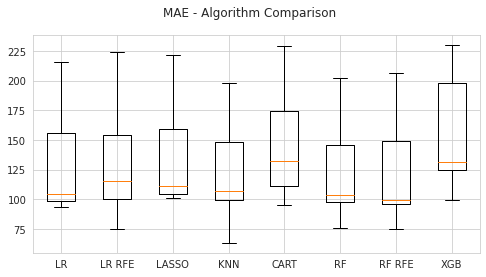

In [726]:
# compare algorithms
fig = plt.figure()
fig.suptitle('MAE - Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Os algoritmos **KNN** e **RandomForest** com seleçao de variaveis parecem o mais adequados a esse problema.

In [727]:
reg = KNeighborsRegressor(n_neighbors=29)
reg.fit(X_train, y_train)
get_r2_mae(reg, X_train, X_test)

R² train = 0.6152457027083479
R² test = 0.5761966311829239
MAE train = 117.46859770114943
MAE test = 130.38397017707362
